In [ ]:
#import the necessary library

In [1]:
from sklearn.datasets import fetch_openml


In [2]:
#fetching mnist dataset using auto parser
mnist = fetch_openml('mnist_784',parser="auto")

In [3]:
x,y=mnist['data'],mnist['target']


In [4]:
#determining the shape of the 'data' dataset
x.shape

(70000, 784)

In [5]:
#determining the shape of the 'target' dataset
y.shape

(70000,)

In [6]:

%matplotlib inline

In [7]:
#importing the matplotlib library for the data visualization
import matplotlib
import matplotlib.pyplot as plt

In [8]:
#converting the data into numpy array
some_digit= x.to_numpy()[36000]



In [9]:
#reshaping the data into 28*28
some_digit_image=some_digit.reshape(28,28)

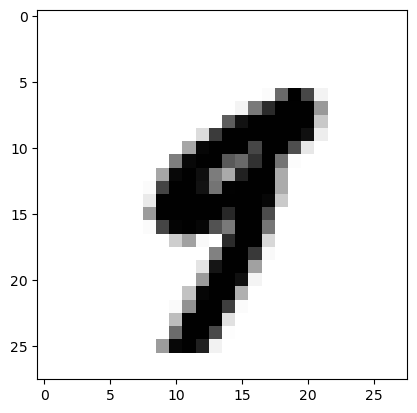

In [10]:
#Data visualization
plt.imshow(some_digit_image , cmap=matplotlib.cm.binary, interpolation='nearest')

(-0.5, 27.5, 27.5, -0.5)

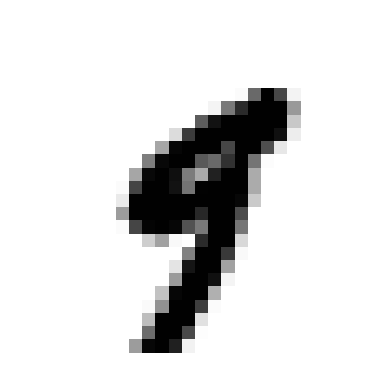

In [11]:
plt.imshow(some_digit_image , cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [12]:
y[36000]

'9'

In [13]:
#creating the train and test data
x_train , x_test =x[:60000],x[60000:]

In [14]:
y_train , y_test = y[:60000],y[60000:]

In [15]:
import numpy as np
shuffle_index=np.random.permutation(60000)

In [16]:
#converting the x_train and y_train to the numpy array
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_train , y_train = x_train[shuffle_index] , y_train[shuffle_index]

In [17]:
#creating a 9 detector

In [18]:
#converting the y_train and y_test into integer datatype
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_9 = (y_train==9)
y_test_9 = (y_test==9)

In [19]:
y_train_9

array([False, False, False, ..., False, False, False])

In [20]:
y_test_9

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [21]:
from sklearn.linear_model import LogisticRegression


In [22]:
clf = LogisticRegression()

In [23]:
clf.fit(x_train,y_train_9)

C:\Users\Supreet Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
clf.predict([some_digit])

array([False])

In [25]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf , x_train, y_train_9, cv=3 , scoring='accuracy')

C:\Users\Supreet Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Supreet Patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [26]:
a

array([0.96155, 0.9593 , 0.95775])

In [27]:
#calculating the accuracy of the model built
a.mean()

0.9595333333333333